## Fortgeschrittene KI

In diesem Abschnitt werden die Daten der fortgeschrittenen KI/EA visualisiert.
Diese besitzt nun drei verschiedene Gene welche je nach Situation aktiviert werden.

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
df_EA = pd.read_csv('Data/EA3.csv', index_col=[0], sep=';')
#df_EA = pd.read_csv('Data/EA2_punkteBasiert.csv', index_col=[0], sep=';')

evolutions = df_EA.groupby(df_EA.index).size().iloc[:1].values # get the number of evolutions
KINumber = df_EA.groupby(df_EA.index).size().size # get the number of different KIs (individuals)
df_EA['Evolution'] = np.arange(evolutions).repeat(KINumber) # add new evolution column
df_EA = df_EA.reset_index().set_index(['Evolution', 'Name']) #make multiindex

### Calulate more Data for analysis
df_Mean = df_EA.groupby(level=0).agg(['mean']).stack(1) # calc mean for every evolution
df_Mean = df_Mean.reset_index().set_index(['Evolution']) #remove multiindex
df_Mean.drop(['Winner', "level_1"], axis=1, inplace=True) # remove useless columns
### Calculates the win percentage of each evolution.
df_wincounter = df_EA.groupby(level=0)['Winner'].value_counts().unstack(fill_value=0).stack().to_frame()
df_cleaned = df_wincounter.rename(columns={0: "WinPercent"}).reset_index().set_index(['Evolution'])
df_winner = df_cleaned.loc[df_cleaned['Winner'] == True]
df_winner.drop(['Winner'], axis=1) # remove useless columns
df_Mean['WinPercent'] = df_winner['WinPercent'].apply(lambda x: x / KINumber * 100) # calculate winpercentage
### Calculate standard deviation
df_standardDeviation = df_EA.std(axis = 0, skipna = True, level = 0)
df_standardDeviation.drop(['Winner', "Fitness", "Score", "GameTime"], axis=1, inplace=True)

domi1 = df_EA[df_EA['dominanceLevel'] == 1]
domi2 = df_EA[df_EA['dominanceLevel'] == 2]
domi3 = df_EA[df_EA['dominanceLevel'] == 3]
domi = df_EA.iloc[df_EA.index.get_level_values('Evolution') == 69]
df_EA

Coord  Winner     Fitness  GameTime      Score  \
Evolution Name                                                              
0         KI_0    <3468, 5, 958>    True  116.233624       684  17.500000   
          KI_1    <3468, 5, 958>    True  113.807201       803  18.000000   
          KI_2    <3468, 5, 958>    True   43.915465      1469  10.434783   
          KI_3    <3468, 5, 958>   False    1.019960       660   1.000000   
          KI_4    <3468, 5, 958>   False    1.019960       663   1.000000   
...                          ...     ...         ...       ...        ...   
38        KI_195  <3468, 5, 958>    True  -95.011713      1980  11.692308   
          KI_196  <3468, 5, 958>    True    6.079235       817   5.833333   
          KI_197  <3468, 5, 958>    True  -15.666435      1597  11.250000   
          KI_198  <3468, 5, 958>    True   -3.720930      1000   6.976744   
          KI_199  <3468, 5, 958>    True   14.219312      1295  10.188679   

                  deffScore  suppScore  townLifeDeviation  supportActions  \
Evolution Name                                                              
0         KI_0           90   8.733624              11.35               0   
          KI_1           90   5.807201              17.12              18   
          KI_2           30   3.480682              28.63               2   
          KI_3            0   0.019960              50.00               0   
          KI_4            0   0.019960              50.00               0   
...                     ...        ...                ...             ...   
38        KI_195       -110   3.295979              30.24               8   
          KI_196        -10  10.245902               9.66               0   
          KI_197        -30   3.083565              32.33               7   
          KI_198        -20   9.302326              10.65               0   
          KI_199          0   4.030633              24.71               2   

                  attackActions  ...  off2-SupportMinCap  supp2-ConquerRadius  \
Evolution Name                   ...                                            
0         KI_0                8  ...                  19                 3928   
          KI_1               10  ...                  98                 3938   
          KI_2               46  ...                  30                 1772   
          KI_3                0  ...                  78                  653   
          KI_4                0  ...                  44                 1627   
...                         ...  ...                 ...                  ...   
38        KI_195             65  ...                  30                 1772   
          KI_196             96  ...                  44                 1758   
          KI_197             48  ...                  30                 1772   
          KI_198             86  ...                  44                 1758   
          KI_199             53  ...                  30                 1772   

                  supp2-AttackMinLife  supp2-SupportRadius  \
Evolution Name                                               
0         KI_0                     49                 3795   
          KI_1                     17                 3907   
          KI_2                     55                 2464   
          KI_3                     16                 2850   
          KI_4                     47                 2080   
...                               ...                  ...   
38        KI_195                   55                 2464   
          KI_196                   15                 3740   
          KI_197                   55                 2464   
          KI_198                   15                 3740   
          KI_199                   55                 2464   

                  supp2-SupportMaxCap  supp2-SupportMinCap  SupportTownRatio  \
Evolution Name                                                                 
0 

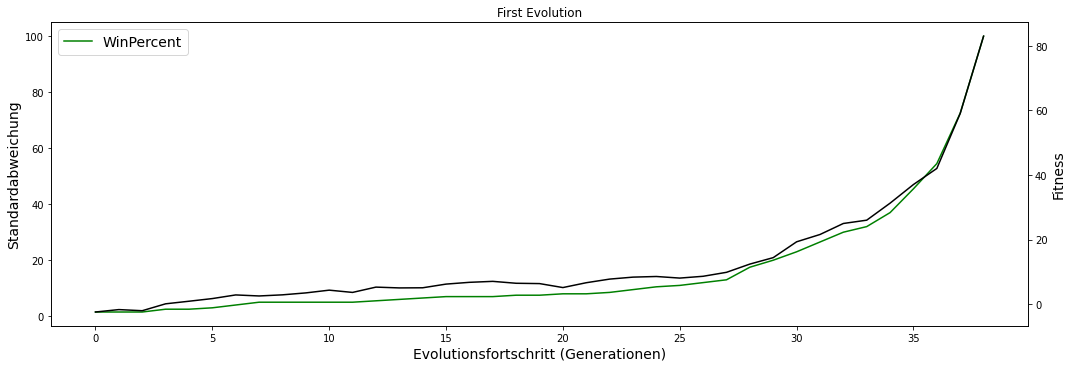

In [41]:
%matplotlib inline
plt.rcParams["figure.figsize"] = (15,5)
fig, ax1 = plt.subplots()

ax1.set_xlabel('Evolutionsfortschritt (Generationen)', fontsize=14)
ax1.set_ylabel('Standardabweichung', fontsize=14)

WinPercent, = ax1.plot(df_Mean['WinPercent'].values, color='green', label='WinPercent')
#Fitness, = ax1.plot(df_Mean["deff1-ConquerRadius"].values, color='blue', label='Fitness')
#Fitness, = ax1.plot(df_Mean["deff2-ConquerRadius"].values, color='red', label='Fitness')
#Fitness, = ax1.plot(df_Mean["deff1-AttackMinLife"].values, color='green', label='Fitness')
#Fitness, = ax1.plot(df_Mean["deff2-AttackMinLife"].values, color='blue', label='Fitness')
#Fitness, = ax1.plot(df_Mean["Score"].values, color='red', label='Fitness')
#Fitness, = ax1.plot(domi["attackActions"].values, color='green', label='Fitness')
#std, = ax1.plot(df_standardDeviation["deff-AttackMinLife"].values, color='blue', label='RadiusExpansionStep')
#std1, = ax1.plot(df_standardDeviation["off-AttackMinLife"].values, color='red', label='MaxConquerRadius')
#std2, = ax1.plot(df_standardDeviation["supp-AttackMinLife"].values, color='green', label='InitialConquerRadius')
ax1.tick_params(axis='y')

ax2 = ax1.twinx()

color='black'
ax2.set_ylabel('Fitness', color=color, fontsize=14)
#ax2.plot(domi["Winner"].values, color='red', label='Fitness')
ax2.plot(df_Mean["Fitness"].values, color=color)
#ax2.plot(df_EA["Fitness"].values, color=color)
ax2.tick_params(axis='y')

fig.tight_layout()
plt.title('First Evolution')
plt.legend(handles = [WinPercent], fontsize=14)
plt.show()

## 3D Analyse der Pareto-front


<IPython.core.display.Javascript object>


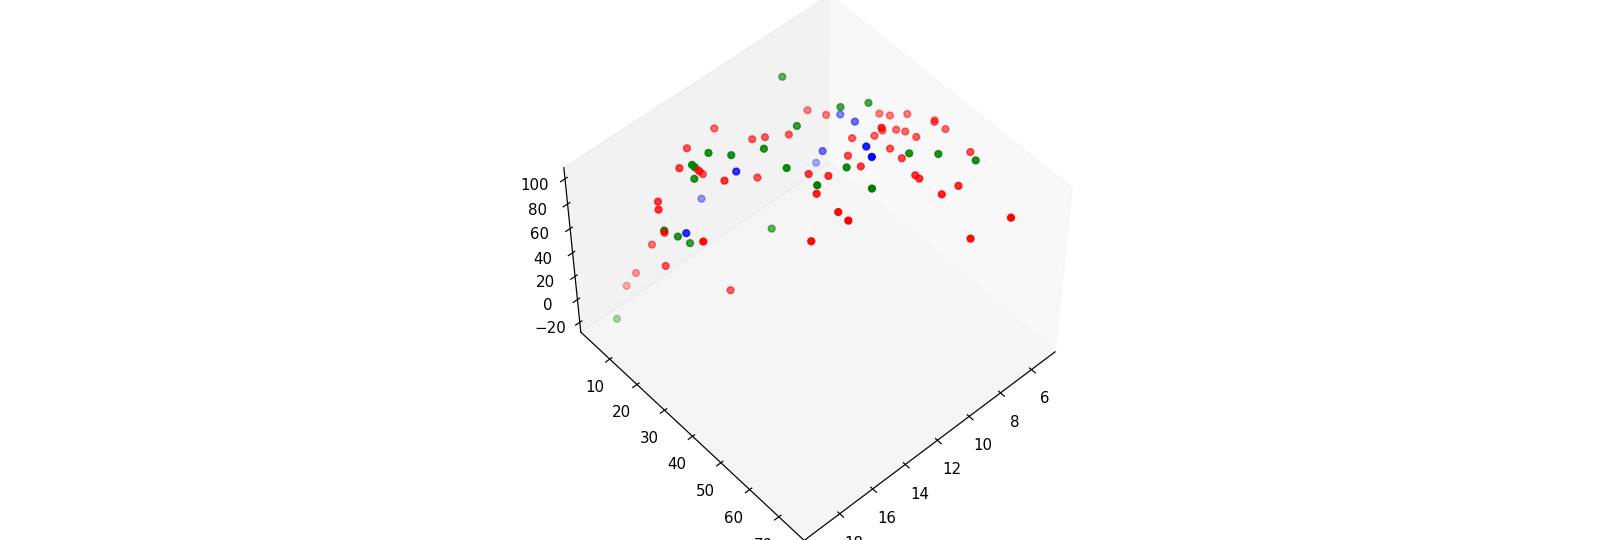

In [31]:
%matplotlib notebook
from mpl_toolkits import mplot3d
from matplotlib import cm
from matplotlib import animation
from mpl_toolkits.mplot3d import axes3d as plt3d

fig = plt.figure()
ax = plt3d.Axes3D(fig)

ax.view_init(45, -45)
ax.grid(False)
#ax.set_zlim(-100, 0)
#plt.xlim(0, 600)
#plt.ylim(0, 50)
colors1 = cm.colors.LinearSegmentedColormap.from_list("", ["red","red"])
colors2 = cm.colors.LinearSegmentedColormap.from_list("", ["green","green"])
colors3 = cm.colors.LinearSegmentedColormap.from_list("", ["blue","blue"])
#fig.colorbar(points, shrink=0.5, aspect=5)

domi1 = df_EA[df_EA['dominanceLevel'] == 1]
domi2 = df_EA[df_EA['dominanceLevel'] == 2]
domi3 = df_EA[df_EA['dominanceLevel'] == 3]
domi = domi2.iloc[domi2.index.get_level_values('Evolution') == 2]

# Data for three-dimensional scattered points
zdata = df_EA["deffScore"].values
xdata = df_EA["Score"].values
ydata = df_EA["suppScore"].values

#points = ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap=colors, vmin=-85, vmax=-10);
points = ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap=colors1)
#ax.plot_trisurf(xdata, ydata, zdata, cmap='viridis', edgecolor='none');
ax.set_title('Score');
ax.set_xlabel('Attack')
ax.set_ylabel('Support')
ax.set_zlabel('Defensive');


def animate_scatters(iteration, points,zdata,ydata,xdata):
    domiA = domi1.iloc[domi1.index.get_level_values('Evolution') == 25]
    domiB = domi2.iloc[domi2.index.get_level_values('Evolution') == 25]
    domiC = domi3.iloc[domi3.index.get_level_values('Evolution') == 25]
    
    ax.clear()
    ax.set_title("Score");
    ax.grid(False)
    #ax.set_zlim(-500, 0)
    #plt.xlim(0, 1500)
    #plt.ylim(0, 100)
    
    # Data for three-dimensional scattered points
    zdata = domiA["deffScore"].values
    xdata = domiA["Score"].values
    ydata = domiA["suppScore"].values
    points = ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap=colors1)
    zdata = domiB["deffScore"].values
    xdata = domiB["Score"].values
    ydata = domiB["suppScore"].values
    points = ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap=colors2)
    zdata = domiC["deffScore"].values
    xdata = domiC["Score"].values
    ydata = domiC["suppScore"].values
    points = ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap=colors3)
    
    return points

# call the animator.  blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate_scatters, fargs=(points,zdata,ydata,xdata), interval=1000, blit=False)
plt.show()